In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Video
from matplotlib import animation

In [2]:
import Euler.Periodic_1D as elr

In [4]:
g = 9.81

day = 24*60*60 # length of day [seconds]
omega = 2*np.pi / day
f = 2*omega*np.sin(np.deg2rad(30))

In [19]:
Lx = 6
nx = 256
dx = Lx/nx

x = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)

In [95]:
um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)

hm_old = 1 + 0.05*np.exp(-5*x**2)
hm_new = np.zeros(nx+1)

h0 = 1

t_start = 0
t_end = 2.2
dt = 0.001

for t in np.arange(t_start, t_end, dt):
    
    # Governing equations for interior points
    um_new = um_old - dt*g*elr.partial_x_cd(hm_old, dx, nx+1)
    hm_new = hm_old - dt*h0*elr.partial_x_cd(um_old, dx, nx+1)
    
    # Boundary conditions
    um_new[0], um_new[-1] = 0, 0
    hm_new[0], hm_new[-1] = 1, 1
    
    # Updation equations
    um_old = um_new
    hm_old = hm_new

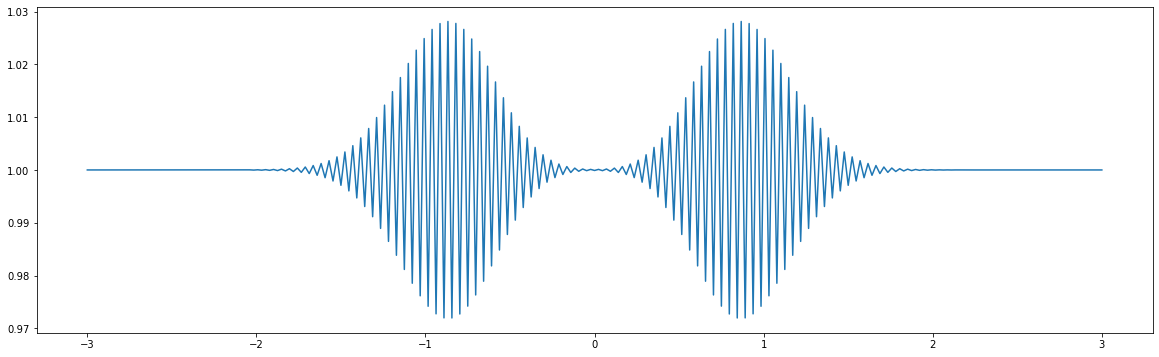

In [96]:
plt.figure(figsize = (20,6))
plt.plot(x,hm_old)

## Staggered grid

In [22]:
Lx = 6
nx = 256
dx = Lx/nx

xu = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)
xt = xu + dx/2
xt = xt[0:-1]

In [23]:
def u_to_t(phi_U, nx, dx):
    
    phi_T = np.zeros(nx)
    
    phi_T = (phi_U[0:nx-1] + phi_U[1:nx])/2
    return phi_T

def t_to_u(phi_T, nx, dx):
    
    phi_U = np.zeros(nx+1)
    
    phi_U[1:nx] = (phi_T[0:nx-1] + phi_T[1:nx])/2
    phi_U[0] = (3 * phi_T[0] - phi_T[1])*0.5
    phi_U[-1] = (3 * phi_T[-1] - phi_T[-2])*0.5
    return phi_U

In [92]:
um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)

hm_old = 1 + 0.01*np.exp(-5*(xt)**2)
hm_new = np.zeros(nx)
h0 = 1

t_start = 0
t_end = 4
dt = 0.001

nsteps = int((t_end - t_start)/dt)

for t in np.linspace(t_start, t_end, nsteps):
    hm_new = hm_old - h0*dt*(um_old[1:nx+1] - um_old[0:nx])/(dx)
    um_new[1:nx] = um_old[1:nx] - g*dt*(hm_new[1:nx] - hm_new[0:nx-1])/dx
    
    um_new[0], um_new[-1] = 0, 0
    
    um_old = um_new
    hm_old = hm_new

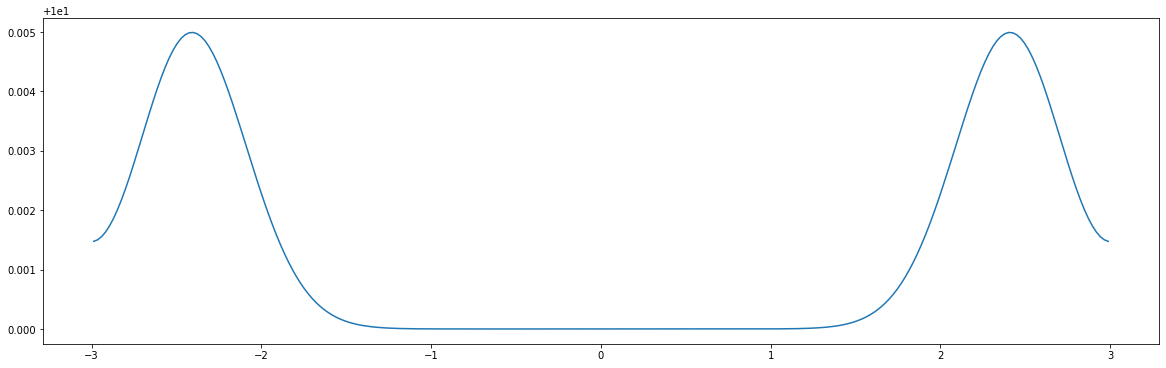

In [93]:
plt.figure(figsize = (20,6))
plt.plot(xt,hm_old)

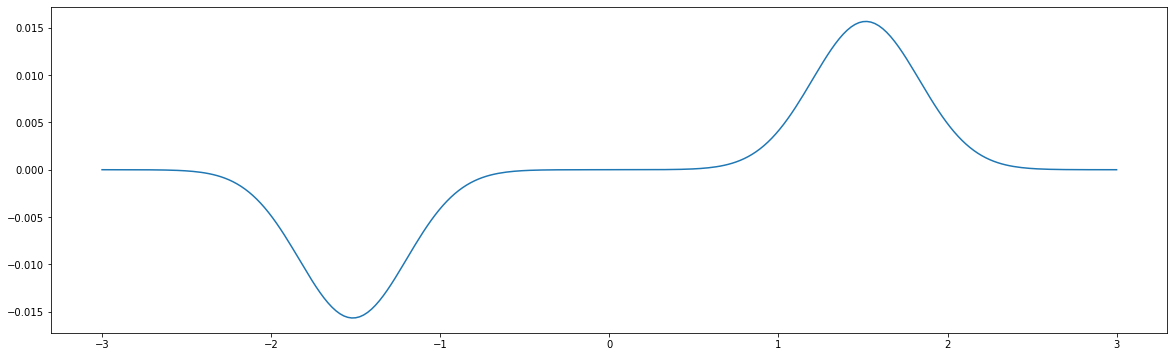

In [73]:
plt.figure(figsize = (20,6))
plt.plot(xu,um_old)